---
# Lecture notes - k-means clustering
---

This is the lecture note for **k-means** clustering.

<p class = "alert alert-info" role="alert"><b>Note</b> that this lecture note gives a brief introduction to k-means clustering. I encourage you to read further about k-means. </p>

Read more:

- [Unsupervised learning - wikipedia](https://en.wikipedia.org/wiki/Unsupervised_learning)
- [Cluster analysis - wikipedia](https://en.wikipedia.org/wiki/Cluster_analysis)
- [k-means clustering - wikipedia](https://en.wikipedia.org/wiki/K-means_clustering)
- [Color quantization - wikipedia](https://en.wikipedia.org/wiki/Color_quantization)
- [Clustering user guide - sklearn](https://scikit-learn.org/stable/modules/clustering.html#k-means)
- [KMeans - sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
- [Find optimal k clusters - analyticsvidhya](https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/)
- [Silhouette (clustering) - wikipedia](https://en.wikipedia.org/wiki/Silhouette_(clustering))
- [ISLRv2 - pp. 516-521](https://www.statlearning.com/)
---

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

X, y = make_blobs(500, centers=4, random_state=42, cluster_std=1)

df = pd.DataFrame([X[:,0], X[:,1], y]).T
df.columns = ['x1', 'x2', 'label']
df['label'] = df['label'].astype(int)
df.head()

,x1,x2,label
0,-7.689054,6.620346,3
1,-9.576514,-6.934404,2
2,6.829682,1.164871,1
3,-2.901306,7.550771,0
4,-5.678413,-7.288185,2


Text(0.5, 1.0, 'Original data')

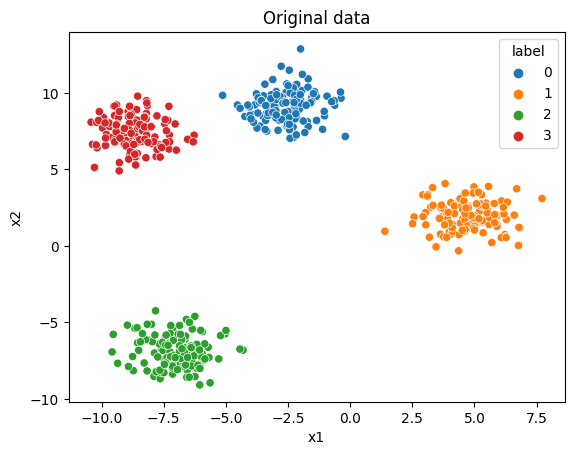

In [15]:
sns.scatterplot(data = df, x= 'x1', y = 'x2', hue = 'label', palette='tab10')
plt.title("Original data")

In [ ]:
# remove label as we don't have it in unsupervised learning
X = df.drop('label', axis = 1)
X.head()

# Feature scaling

- no train test split
- use whole dataset for scaling


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X[:5]


array([[-0.81539333,  0.58938951],
       [-1.17344434, -1.55328827],
       [ 1.93881064, -0.27298895],
       [ 0.0928425 ,  0.73646712],
       [-0.43397474, -1.60921239]])

Text(0.5, 1.0, 'Scaled X with feature standardization - no labels')

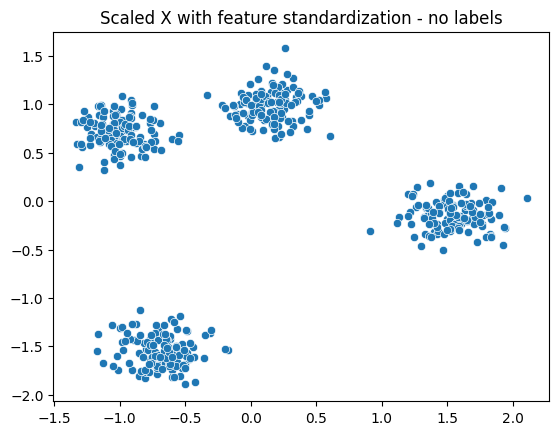

In [19]:
sns.scatterplot(x = scaled_X[:, 0], y = scaled_X[:,1])
plt.title("Scaled X with feature standardization - no labels")

## k-means

In [21]:
from sklearn.cluster import KMeans

clusters = range(1, 10)

sum_squared_distances = [KMeans(k, n_init="auto").fit(scaled_X).inertia_ for k in clusters]
sum_squared_distances

[999.9999999999993,
 522.1570539287738,
 116.09567852755526,
 28.78693897887401,
 25.61536554940795,
 23.560388255234905,
 21.409767936725192,
 19.007981254281074,
 16.775571241423908]

Text(0.5, 1.0, 'Elbow plot to find k')

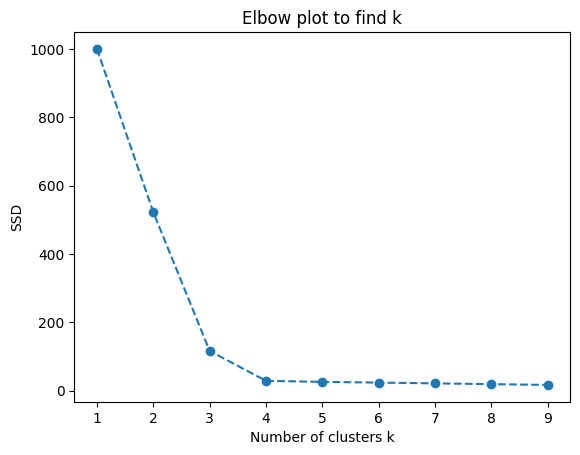

In [25]:
plt.plot(clusters, sum_squared_distances, '--o')
plt.xlabel('Number of clusters k')
plt.ylabel("SSD")
plt.title("Elbow plot to find k")

In [27]:
pd.Series(sum_squared_distances).diff()[1:]

# k = 3

1   -477.842946
2   -406.061375
3    -87.308740
4     -3.171573
5     -2.054977
6     -2.150620
7     -2.401787
8     -2.232410
dtype: float64

# Silhouette

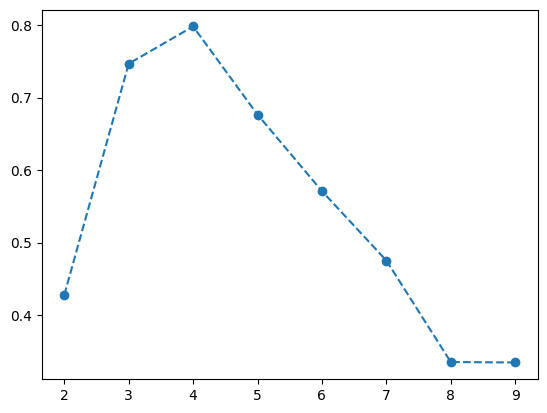

In [44]:
from sklearn.metrics import silhouette_score

# Vi har tränat vår kmeans men med olika k. (Olika kluster)
kmeans = [KMeans(k, n_init="auto").fit(scaled_X) for k in clusters]

# för att kunna göra en silhouette score så måste den ta in x och kmeans. Man måste skapa dem innan.
silhouette_score = [silhouette_score(scaled_X, kmean.labels_) for kmean in kmeans[1:]]

plt.plot(clusters[1:], silhouette_score, '--o')

# Visualization

In [53]:
df_plot = pd.DataFrame(scaled_X, columns=['x1', 'x2'])
df_plot.head()

,x1,x2
0,-0.815393,0.589390
1,-1.173444,-1.553288
2,1.938811,-0.272989
3,0.092842,0.736467
4,-0.433975,-1.609212


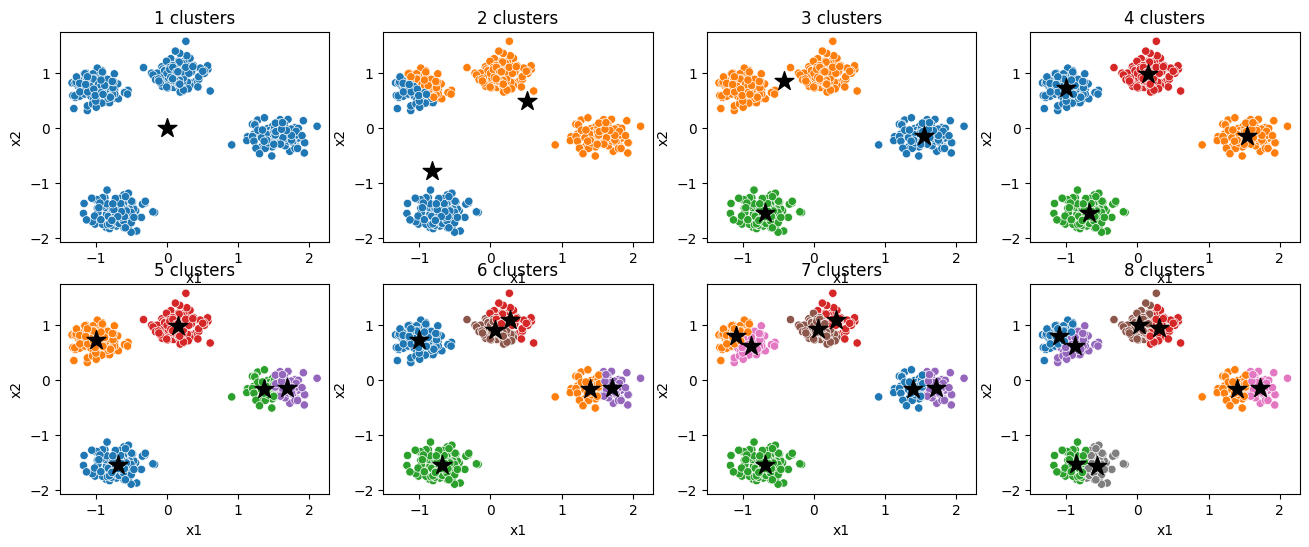

In [73]:
df_plot = pd.DataFrame(scaled_X, columns=['x1', 'x2'])

# plotta ut antalet klustrar
fig, axes = plt.subplots(2, 4, figsize=(16, 6))

for i, ax in enumerate(axes.flatten()):
    clusters_centers = kmeans[i].cluster_centers_
    df_plot['label'] = kmeans[i].labels_

    sns.scatterplot(data= df_plot, x='x1', y='x2', hue='label', palette='tab10', ax=ax)
    ax.scatter(clusters_centers[:,0], clusters_centers[:,1], s = 200, marker = "*", color = 'black')

    ax.legend().remove()

    ax.set(title = f"{i+1} clusters")

In [70]:
kmeans[1].cluster_centers_

array([[-0.82593758, -0.79052933],
       [ 0.510531  ,  0.48864434]])